In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import my_data
import numpy as np
import matplotlib.pyplot as plt
import configparser
from os.path import join as oj
import my_data
config = configparser.ConfigParser()
config.read("../config.ini")
save_path = config["PATHS"]["model_path"]


# load data from new

In [3]:
x, y, num_classes, class_dict = my_data.load_layer_data( oj(config["DATASET"]["data_path"], "DataLNO")
)

In [4]:
x_pool = my_data.load_pool_data(
            oj(config["DATASET"]["data_path"],"voltif_LNO")
)

In [10]:
data_min, data_max = np.min(x[:-4]), np.max(x[:-4])
x = (x - data_min) / (data_max - data_min)

In [11]:
x_pool = x_pool.astype(np.float16)
x_pool = (x_pool - data_min) / (data_max - data_min)

In [ ]:
# plt hist with normalized
plt.hist(x_pool.flatten(), bins=100)


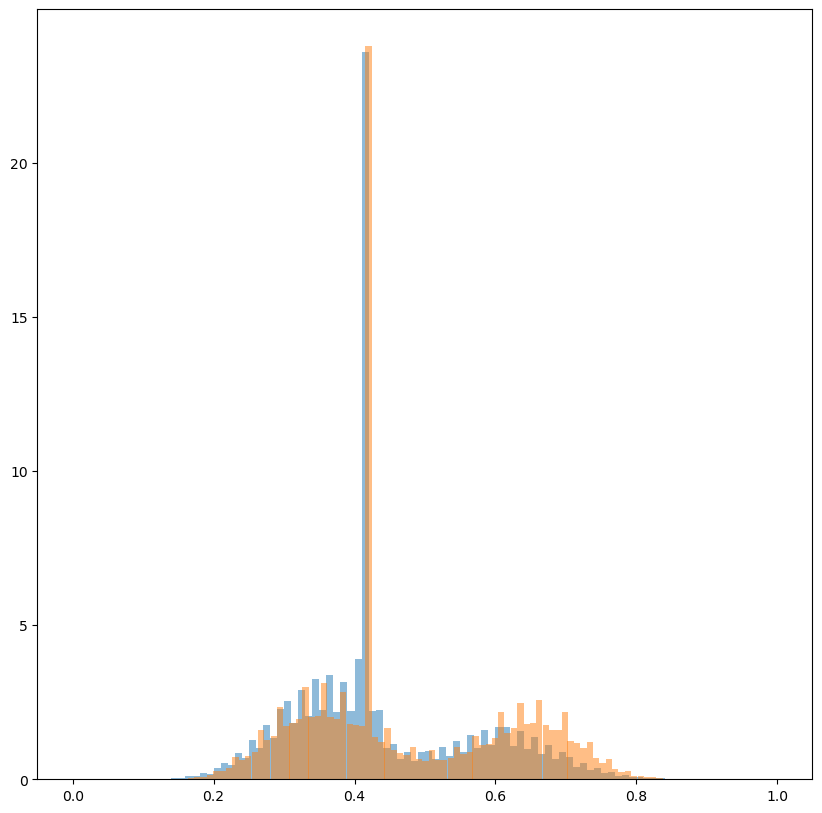

In [15]:
# plot the distributions of x and xpool over each other as probality 
plt.figure(figsize=(10, 10))
plt.hist(x.flatten(), bins=100, alpha=0.5, label="x", density = True);

plt.hist(x_pool.flatten(), bins=100, alpha=0.5, label="x_pool",density = True);

In [6]:
x_pool.min()

12

In [7]:
x.max()

255.0

In [8]:
x.min()

0.0

In [17]:
class_dict


{0: 26, 1: 64, 2: 204}

In [ ]:
voltif_LNO

In [21]:

from skimage import io
data_path = oj(config["PATHS"]["progress_results"], '0271415942')
import os
images_folder = oj(data_path, "images")
annot_folder = oj(data_path, "human_annotated")
assert len(os.listdir(images_folder)) == len(os.listdir(annot_folder))
images = []
annotations = []
for file_name in os.listdir(images_folder):
    images.append(io.imread(oj(images_folder, file_name)))
    annotations.append(io.imread(oj(annot_folder, file_name)))

In [23]:
np.unique(np.asarray(annotations))

array([ 26,  64, 204], dtype=uint8)

In [24]:
class_dict

{0: 26, 1: 64, 2: 204}

In [13]:

from skimage import io
data_path = oj(config["PATHS"]["progress_results"], '0271415942')
import os
images_folder = oj(data_path, "images")
annot_folder = oj(data_path, "human_annotated")
assert len(os.listdir(images_folder)) == len(os.listdir(annot_folder))
images = []
annotations = []
for file_name in os.listdir(images_folder):
    images.append(io.imread(oj(images_folder, file_name)))
    annotations.append(io.imread(oj(annot_folder, file_name)))
# print(np.unique(np.asarray(annotations)))
# make a list of the values in the predictions
annotations = np.asarray(annotations)
annotation_vals = np.unique(annotations)
inverse_class_dict = {v: k for k, v in class_dict.items()}
list_of_old_vals = sorted(list(inverse_class_dict.keys()))

annotations = np.asarray(annotations)
new_annotations = np.zeros_like(annotations)
for i,val in enumerate(annotation_vals):
    new_annotations[annotations == val] = list_of_old_vals[np.minimum(i, len(list_of_old_vals)-1)]
# go through 
    



# return_dataset = TensorDataset(
#     torch.Tensor(np.asarray(images)[:, None]), torch.Tensor(np.asarray(new_annotations))
# )
# return return_dataset


[ 64 102 128 242]


In [20]:
for i in range(annotations.shape[0]):
    #save the new annotation under the same file name as the old
    io.imsave(oj(annot_folder, os.listdir(images_folder)[i]), new_annotations[i])

In [19]:
len(annotations_list)

4

In [14]:
np.unique(new_annotations)

array([ 26,  64, 204], dtype=uint8)

In [9]:
annotated_set = my_data.load_annotated_imgs(oj(config["PATHS"]["progress_results"], '0271415942')oj(config["PATHS"]["progress_results"], '0271415942'))

In [10]:
annot_img = (annotated_set[0][1]).numpy()

In [11]:
class_dict

{0: 26, 1: 64, 2: 204}

In [12]:
np.unique(annot_img)

array([ 64., 102., 242.], dtype=float32)

In [13]:
class_dict

{0: 26, 1: 64, 2: 204}

In [3]:
x, y, num_classes, class_dict = my_data.load_layer_data(
    oj(config["DATASET"]["data_path"], "lno")
)

In [4]:
x_ho, y_ho, num_classes_ho, class_dict_ho = my_data.load_layer_data(
    oj(config["DATASET"]["data_path"], "lno_halfHour")
)

In [ ]:
import numpy as np
my_arr = [4,5,6,6,7]
my_arr = np.asarray(my_arr)
print(my_arr[3,2])

In [ ]:
np.random.choice(10, 3, replace=False)

In [ ]:
np.unique(y)

In [ ]:
np.unique(y_ho)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(x[0, 0, :, :])
axes[1].imshow(y[ 0, :, :], vmin =-1, vmax = 2)
# ax

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
test_show = y_ho[2, :, :].astype(np.int32)
test_show[test_show == 255] = -1
axes[0].imshow(x_ho[2, 0, :, :])
axes[1].imshow(test_show, vmin =-1, vmax = 2)

In [ ]:
plt.hist(x_ho.flatten(), density=True, bins =100);
plt.hist(x.flatten(), alpha = 0.5, color = 'red', density=True,bins =100);
plt.ylim(0, 0.03)

In [ ]:
x[0,0,0,0]